In [100]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [134]:
inputsize=1
time_step=10
Lr=0.02

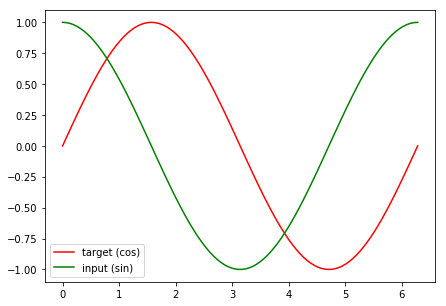

In [135]:
steps=np.linspace(0, np.pi*2, 100, dtype=np.float32)
x_np=np.sin(steps)
y_np=np.cos(steps)
plt.figure(0, figsize=(7, 5))
plt.plot(steps, x_np, 'r-', label='target (cos)')
plt.plot(steps, y_np, 'g-', label='input (sin)')
plt.legend(loc='best')
plt.show()

In [136]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn= nn.RNN(
                    input_size=inputsize,
                    hidden_size= 32,
                    num_layers=1,
                    batch_first=True)
        
        self.out=nn.Linear(32, 1)
        
        
    def forward(self, x, h_state):
        r_out, h_state=self.rnn(x, h_state)
        outs=[]
        for time_step in range(r_out.size(1)):
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state # we have not used faltten
        

In [137]:
rnn =RNN()
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


In [138]:
optimizer=torch.optim.Adam(rnn.parameters(), lr=Lr)
loss_func =torch.nn.MSELoss()

In [139]:
h_state=None

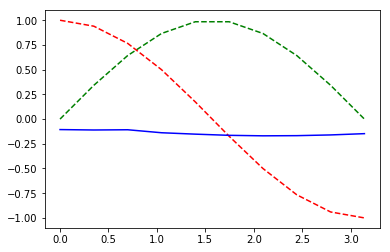

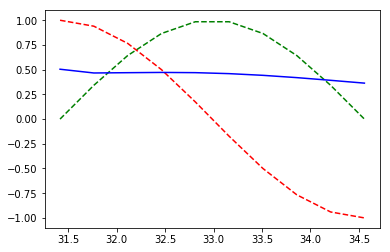

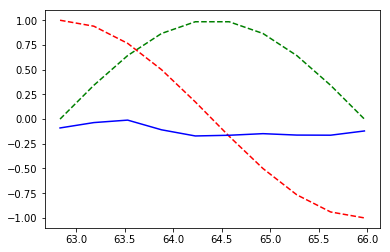

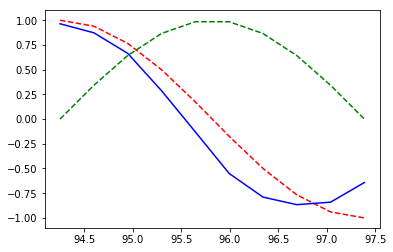

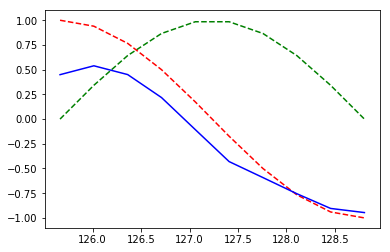

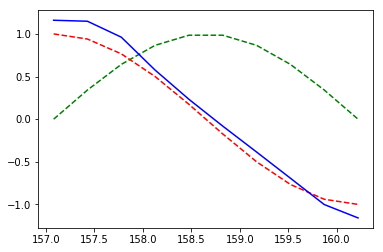

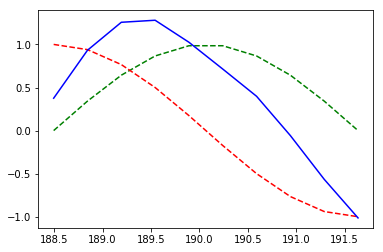

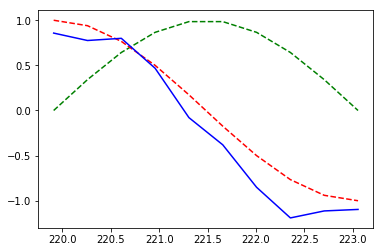

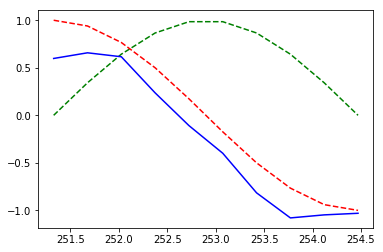

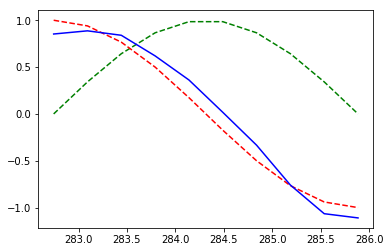

In [140]:
for step in range(100):
        start, end = step*np.pi, (step+1)*np.pi
        steps=np.linspace(start, end, time_step, dtype=np.float32)
        
        x_np=np.sin(steps)
        y_np=np.cos(steps)
        
        x = torch.from_numpy(x_np[np.newaxis, :, np.newaxis])  #new axis and batch in it  
        y = torch.from_numpy(y_np[np.newaxis, :, np.newaxis])
        
        prediction, h_state =rnn(x, h_state)
        h_state=h_state.data
        
        loss=loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step%10==0:            
            plt.plot(steps, x_np.flatten(), 'g--')
            plt.plot(steps, y_np.flatten(), 'r--')
            plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
            plt.draw()
            plt.show()
        

In [141]:
#have to do for another peroidic function

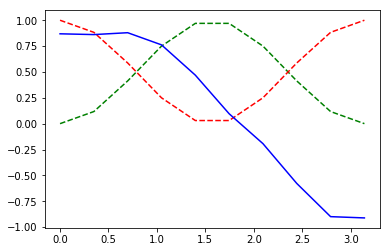

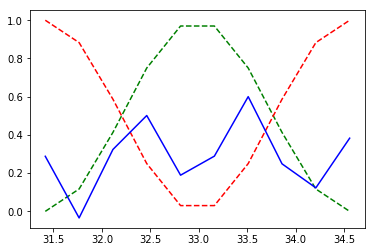

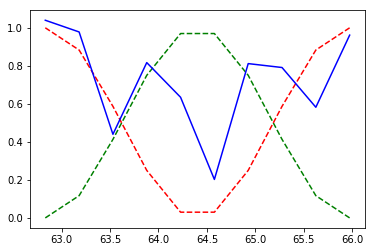

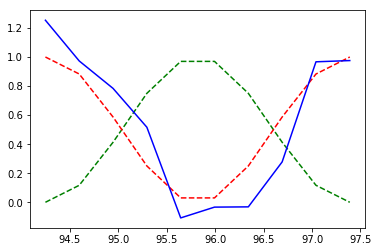

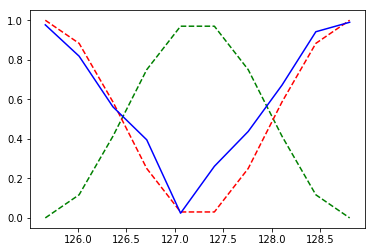

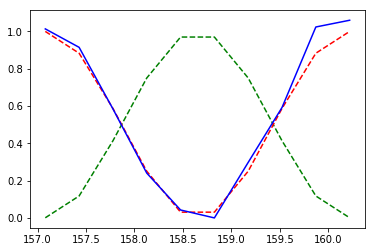

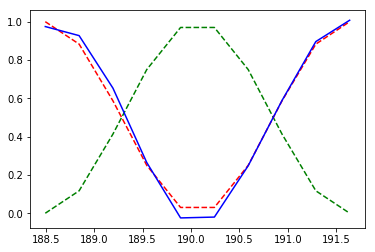

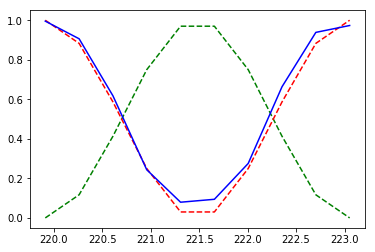

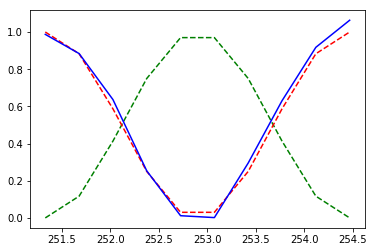

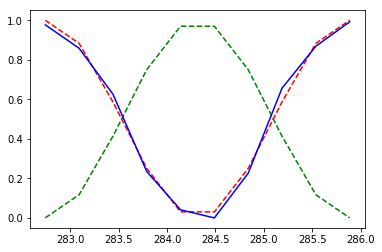

In [142]:
for step in range(100):
        start, end = step*np.pi, (step+1)*np.pi
        steps=np.linspace(start, end, time_step, dtype=np.float32)
        
        x_np=(np.sin(steps)**2)
        y_np=(np.cos(steps)**2)        
        x = torch.from_numpy(x_np[np.newaxis, :, np.newaxis])  #new axis and batch in it  
        y = torch.from_numpy(y_np[np.newaxis, :, np.newaxis])
        
        prediction, h_state =rnn(x, h_state)
        h_state=h_state.data
        
        loss=loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step%10==0:            
            plt.plot(steps, x_np.flatten(), 'g--')
            plt.plot(steps, y_np.flatten(), 'r--')
            plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
            plt.draw()
            plt.show()
        